# DAS Data Preparation

This notebook demonstrates how to use the `das_data_preparation.py` script to:
1. Load and filter earthquake/noise catalog data.
2. Generate file paths for your DAS data (events and noise).
3. Optionally visualize a simple scatter plot of distance vs. magnitude.

---


In [6]:
# notebook cell 1: Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the helper script
from my_scripts.das_data_preparation import (
    prepare_das_data,
    save_file_paths,
    load_file_paths
)

## Step 1: Prepare DAS Data

We'll call the `prepare_das_data` function, which loads the CSV catalogs, removes missing data, splits events and noise into train/test sets, and produces lists of valid file paths. Adjust the paths according to your setup.


In [3]:
# notebook cell 2: Prepare data
event_csv = "catalog/earthquake_catalog.csv"
noise_csv = "catalog/noise_catalog.csv"
data_dir = "gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/"

(
    train_event_files,
    test_event_files,
    train_event_amplitudes,
    test_event_amplitudes,
    train_noise_files,
    test_noise_files
) = prepare_das_data(
    event_csv_path=event_csv,
    noise_csv_path=noise_csv,
    data_dir=data_dir,
    amplitude_threshold=40,  # example threshold
    noise_ratio=10,          # ratio of noise windows to events
    train_ratio=0.8          # 80% train, 20% test
)

print("Train Events:", len(train_event_files))
print("Test Events: ", len(test_event_files))
print("Train Noise: ", len(train_noise_files))
print("Test Noise:  ", len(test_noise_files))


File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/05000/event_05640_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/05000/event_05087_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/02000/event_02949_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/03000/event_03660_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/03000/event_03706_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/01000/event_01243_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/02000/event_02818_1.h5
File does not exist: gs://sep-data-backup/fantine/earthquake-detection-ml/processed_data/das/event/05000/event_05642_1.h5
File does not exist: gs:

KeyboardInterrupt: 

## Step 2: (Optional) Save/Load File Paths

If you want to persist the generated file paths for later usage, you can save them as pickle files and load them whenever needed.


In [4]:
# notebook cell 3: Save/Load file paths (optional)
save_file_paths(train_event_files, "train_event_files.pkl")
save_file_paths(train_event_amplitudes, "train_event_amplitudes.pkl")
save_file_paths(test_event_files, "test_event_files.pkl")
save_file_paths(test_event_amplitudes, "test_event_amplitudes.pkl")

save_file_paths(train_noise_files, "train_noise_files.pkl")
save_file_paths(test_noise_files, "test_noise_files.pkl")

# Example of loading back:
loaded_train_events = load_file_paths("train_event_files.pkl")
print(f"Loaded {len(loaded_train_events)} train event file paths.")


NameError: name 'train_event_files' is not defined

## Step 3: (Optional) Simple Visualization

Below is an optional snippet for visualizing event magnitudes vs. distances, assuming you have the relevant `DataFrame` loaded. You can customize this part as needed.


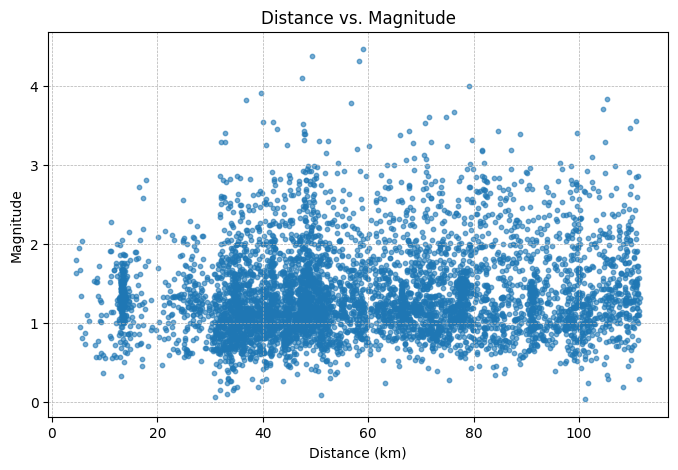

In [5]:
# notebook cell 4: Example data visualization (optional)
# Suppose you have loaded df_events already:
df_events = pd.read_csv(event_csv)

# For demonstration, let’s extract some columns and do a simple scatter
if "distance" in df_events.columns and "magnitude" in df_events.columns:
    distance_km = df_events["distance"] / 1000
    magnitude = df_events["magnitude"]

    plt.figure(figsize=(8,5))
    plt.scatter(distance_km, magnitude, alpha=0.6, s=10)
    plt.xlabel("Distance (km)")
    plt.ylabel("Magnitude")
    plt.title("Distance vs. Magnitude")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()
else:
    print("Could not visualize because 'distance' or 'magnitude' columns are missing.")
